C:\Users\Doyeon\Desktop\notebook_data\nyc_taxi


(-0.5, 637.5, -0.5, 1226.5)

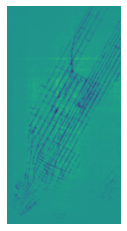

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%cd ~/Desktop/notebook_data/nyc_taxi

data_filename = 'data/nyc_data.csv'
fare_filename = 'data/nyc_fare.csv'

data = pd.read_csv(data_filename, parse_dates=['pickup_datetime', 'dropoff_datetime'])
fare = pd.read_csv(fare_filename, parse_dates=['pickup_datetime'])

pickup = data[['pickup_longitude', 'pickup_latitude']].values
dropoff = data[['dropoff_longitude', 'pickup_latitude']].values

evening = (data.pickup_datetime.dt.hour >= 19).values
n = np.sum(evening)

weights = np.zeros(2*n)
weights[:n] = -1
weights[n:] = +1

points = np.r_[pickup[evening], dropoff[evening]]

def lat_lon_to_pixels(lat, lon):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lon + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x,y)

lon, lat = points.T
x, y = lat_lon_to_pixels(lat, lon)

lon_min, lat_min = -74.0214, 40.6978
lon_max, lat_max = -73.9524, 40.7982
x_min, y_min = lat_lon_to_pixels(lat_min, lon_min)
x_max, y_max = lat_lon_to_pixels(lat_max, lon_max)
bin = .00003
bins_x = np.arange(x_min, x_max, bin)
bins_y = np.arange(y_min, y_max, bin)

grid, _, _ = np.histogram2d(y, x, weights=weights, bins=(bins_y, bins_x))
density = 1. / (1. + np.exp(-.5 * grid))

plt.imshow(density, origin='lower', interpolation='bicubic')
plt.axis('off')



In [12]:
x = np.arange(1, 11)
x_row = x.reshape((1, -1))
x_col = x[:, np.newaxis]
np.dot(x_col, x_row)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])